# Plot AUTO07P Data

This notebook loads precomputed data files and recreates the plots shown in figures 6 and 7 of [Bramburger et al.] for the Swift-Hohenberg equation: we show that wave trains in the Swift-Hohenberg equation form a torus and predict the effect of radial terms on the ODE Hamiltonian H.

## Setup

First, we import the relevant packages we need.

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

class MidpointNormalize(Normalize):
#	normalizes colormaps
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Plot $S=0$ in $(\mu,H)$ space

We plot the curve $S=0$, where $S=E-H$, E is the PDE energy, and $H$ is the ODE Hamiltonian associated with the Swift-Hohenberg equation.

<IPython.core.display.Javascript object>


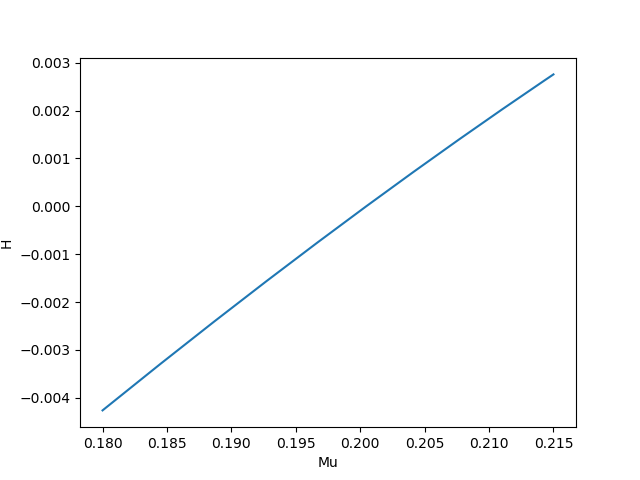

In [8]:
df_s0 = pd.read_pickle('data/df_s0.pd')
ax1 = df_s0.plot('Mu', 'h', legend=False)
ax1.set(ylabel='H')
plt.savefig("figure_1.pdf")

## Plot the contours of $S$ in $(\mu,H)$ space

We plot the values of $S$ in $(\mu,H)$ space.

<IPython.core.display.Javascript object>


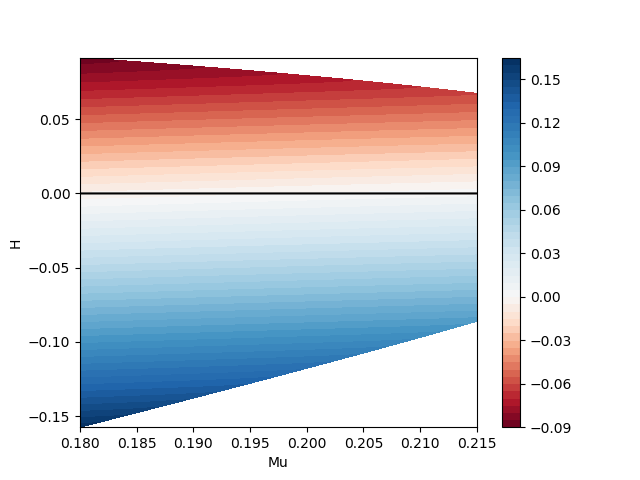

In [9]:
df_surface = pd.read_pickle('data/df_surface.pd')
fig3, ax3 = plt.subplots(1,1, sharex=True, sharey=True)
tcf = ax3.tricontourf(df_surface['Mu'], df_surface['H'], df_surface['S'], 50, norm=MidpointNormalize(midpoint=0), cmap=cm.RdBu)
fig3.colorbar(tcf)
plt.plot(df_surface['Mu'], np.zeros(len(df_surface['Mu'])), 'k')
ax3.set(xlabel='Mu', ylabel='H')
fig3.savefig("figure_3.pdf")

## Plot torus of periodic orbits

We plot the torus of periodic solutions at the Maxwell point.

<IPython.core.display.Javascript object>


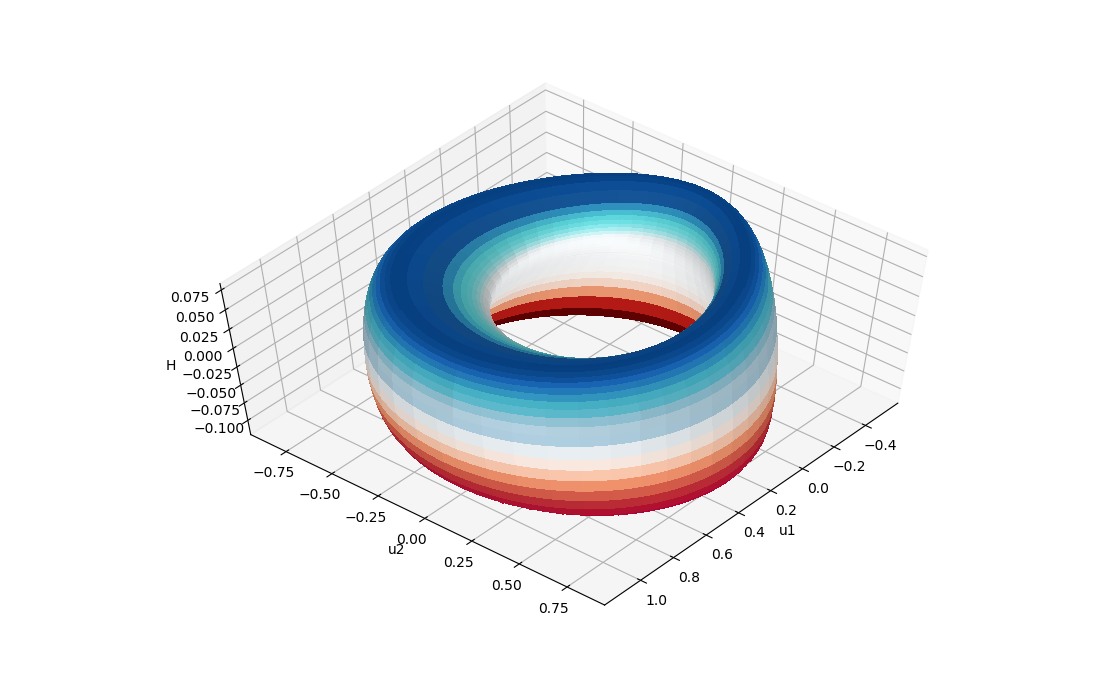

In [10]:
x = np.load("data/torus_x.npy")
y = np.load("data/torus_y.npy")
z = np.load("data/torus_z.npy")

azimuth = 40
elevation = 60
light = LightSource(90, )
illuminated_surface = light.shade(z, cmap=cm.RdBu)

fig2 = plt.figure(figsize=(11,7))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.view_init(elevation, azimuth)
ax2.plot_surface(x, y, z, facecolors=illuminated_surface, linewidth=0, antialiased=False, norm=MidpointNormalize(midpoint=0))
ax2.set(xlabel='u1', ylabel='u2', zlabel='H')
plt.savefig("figure_2.pdf")